<a href="https://colab.research.google.com/github/DepartmentOfStatisticsPUE/bi-2021/blob/main/materialy-wyklady/bi_2021_06_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Wczytanie danych z pliku `xml` ze strony https://api.tvn24.pl/iframe,deaf53460a0d7ce9bdca0b1147e240eb,22.html#main/sondaz dotyczący wyników sondażu exit poll. 

LINK: https://api.tvn24.pl/xml/139,33568bbb2a42.xml

```
<sondaz>
<section name="wyniki">
<subsection name="wyniki" active="1" wariacje="1">
<stopka>
<![CDATA[ Ipsos dla TVN24, TVP i Polsatu. Late poll z 90 proc. komisji ]]>
</stopka>
<partia id="pis" wynik_m2="35.7" wynik="37.7" wynik_p2="39.7"/>
<partia id="po" wynik_m2="25.6" wynik="23.6" wynik_p2="21.6"/>
<partia id="razem" wynik_m2="3.9" wynik="3.9" wynik_p2="3.9"/>
<partia id="korwin" wynik_m2="4.9" wynik="4.9" wynik_p2="4.9"/>
<partia id="psl" wynik_m2="5.2" wynik="5.2" wynik_p2="5.2"/>
<partia id="zl" wynik_m2="7.5" wynik="7.5" wynik_p2="7.5"/>
<partia id="kukiz" wynik_m2="8.7" wynik="8.7" wynik_p2="8.7"/>
<partia id="nowoczesna" wynik_m2="7.7" wynik="7.7" wynik_p2="7.7"/>
<partia id="inna-partia" wynik_m2="0.8" wynik="0.8" wynik_p2="0.8"/>
</subsection>
</section>
</sondaz>
```

In [1]:
library(xml2)
library(rvest)

In [10]:
sondaz <- read_xml("https://api.tvn24.pl/xml/139,33568bbb2a42.xml")
sondaz

{xml_document}
<sondaz>
[1] <section name="wyniki">\n  <subsection name="wyniki" active="1" wariacje= ...

In [8]:
sondaz %>% 
  html_nodes("partia") %>% 
  html_attr("wynik") %>% 
  print()

[1] "37.7" "23.6" "3.9"  "4.9"  "5.2"  "7.5"  "8.7"  "7.7"  "0.8" 


2. Pobieramy dane ze Spotify z pakietem `spotifyr`

In [11]:
devtools::install_github('charlie86/spotifyr')

openssl   (1.4.3 -> 1.4.4 ) [CRAN]
snakecase (NA    -> 0.11.0) [CRAN]
janitor   (NA    -> 2.1.0 ) [CRAN]


Installing 3 packages: openssl, snakecase, janitor

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



✔  checking for file ‘/tmp/RtmpUudDeS/remotes3ae019735/charlie86-spotifyr-1bc55d5/DESCRIPTION’
─  preparing ‘spotifyr’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
   Omitted ‘LazyData’ from DESCRIPTION
─  building ‘spotifyr_2.1.1.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [18]:
library(spotifyr)
library(ggplot2)

Wpisujemy odpowiednie kody dostępu

In [14]:
Sys.setenv(SPOTIFY_CLIENT_ID = 'xxx')
Sys.setenv(SPOTIFY_CLIENT_SECRET = 'xxx')

access_token <- get_spotify_access_token()

[1] "BQD-ua0YFSqUwbfw3uh-UN7VM7tSnaBMA4kDqhPBy20xpbKUjRvci3BzA3qKHIq4mJu_-HPXMzNBz0wRVGA"

Ściągniemy dane dotyczące jakiegoś zespołu.

In [17]:
satyr <- get_artist_audio_features('satyricon')
str(satyr, 1)

'data.frame':	196 obs. of  39 variables:
 $ artist_name                 : chr  "Satyricon" "Satyricon" "Satyricon" "Satyricon" ...
 $ artist_id                   : chr  "221Rd0FvVxMx7eCbWqjiKd" "221Rd0FvVxMx7eCbWqjiKd" "221Rd0FvVxMx7eCbWqjiKd" "221Rd0FvVxMx7eCbWqjiKd" ...
 $ album_id                    : chr  "1CqVugK1U61uHDGONlHnzy" "1CqVugK1U61uHDGONlHnzy" "1CqVugK1U61uHDGONlHnzy" "1CqVugK1U61uHDGONlHnzy" ...
 $ album_type                  : chr  "album" "album" "album" "album" ...
 $ album_images                :List of 196
 $ album_release_date          : chr  "2021-05-28" "2021-05-28" "2021-05-28" "2021-05-28" ...
 $ album_release_year          : num  2021 2021 2021 2021 2021 ...
 $ album_release_date_precision: chr  "day" "day" "day" "day" ...
 $ danceability                : num  0.114 0.102 0.181 0.148 0.173 0.203 0.0683 0.211 0.501 0.429 ...
 $ energy                      : num  0.977 0.956 0.972 0.962 0.99 0.977 0.0796 0.866 0.908 0.746 ...
 $ key                         : in

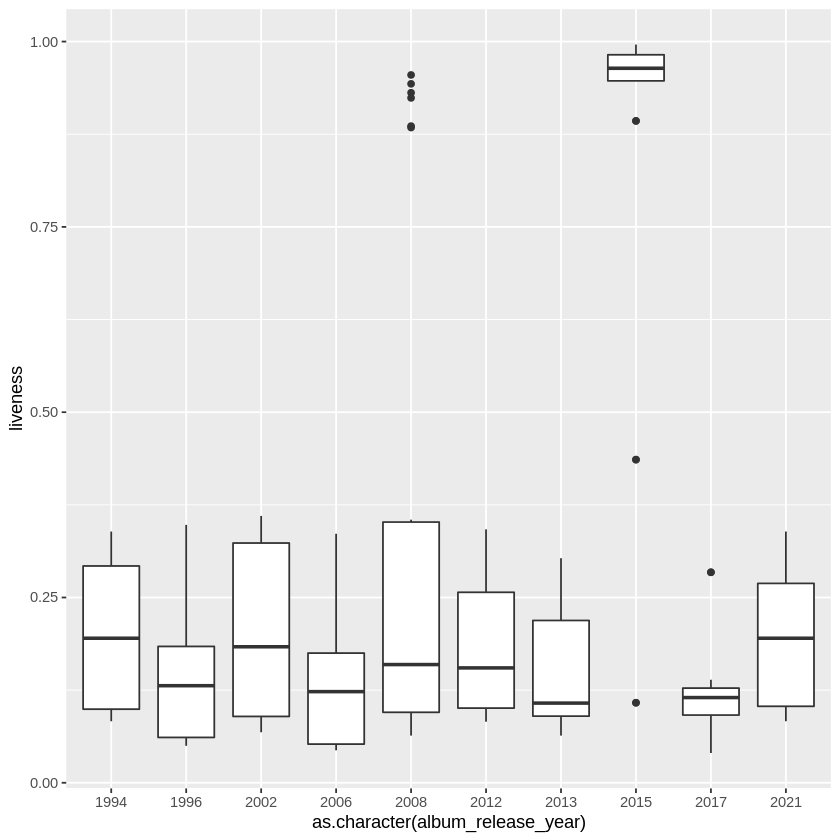

In [19]:
ggplot(data = satyr, aes(x = as.character(album_release_year), 
                         y = liveness)) +
                         geom_boxplot()

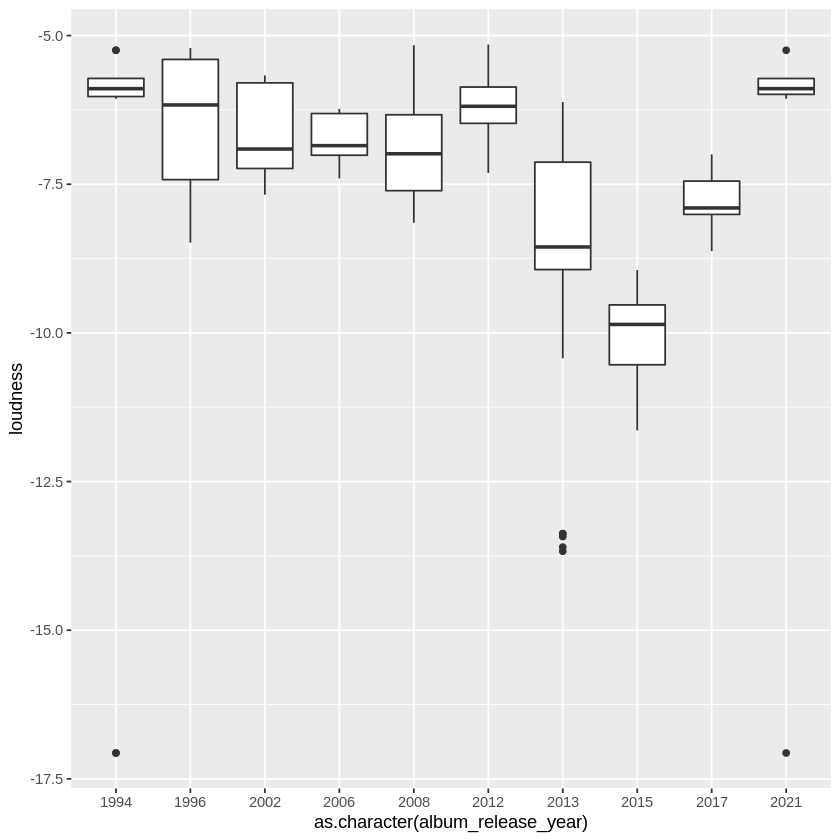

In [20]:
ggplot(data = satyr, aes(x = as.character(album_release_year), 
                         y = loudness)) +
                         geom_boxplot()